In [11]:
import os
import keras
from keras import models
from keras.preprocessing import image
from matplotlib import pyplot as plt

In [13]:
predict_data = '/home/kasparov/workspace/Python/DogCat_Kaggle/DemoTest/RealData'
best_model = '/home/kasparov/workspace/Python/DogCat_Kaggle/BestModel/vgg16.hdf5'

IMAGE_SIZE = 150

In [14]:
# load best model to predict real image
model = models.load_model(best_model)


File name:  dog_4.jpeg
Probability predict is :  100.0
Class predict is       :  dog
True class is          :  dog

File name:  dog-and-cat_0.png
Probability predict is :  100.0
Class predict is       :  dog
True class is          :  unknown

File name:  cat_3.jpeg
Probability predict is :  99.99999999997084
Class predict is       :  cat
True class is          :  cat

File name:  dog_2.jpeg
Probability predict is :  100.0
Class predict is       :  dog
True class is          :  dog

File name:  unknown_cat_0.jpeg
Probability predict is :  99.92496371269226
Class predict is       :  dog
True class is          :  unknown

File name:  dog-and-cat_4.jpeg
Probability predict is :  99.935382604599
Class predict is       :  dog
True class is          :  unknown

File name:  dog_5.jpeg
Probability predict is :  100.0
Class predict is       :  dog
True class is          :  dog

File name:  cat_0.jpeg
Probability predict is :  99.99999999978832
Class predict is       :  cat
True class is        

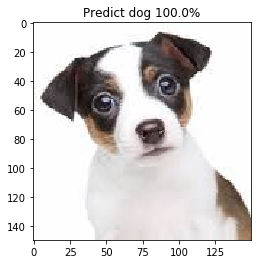

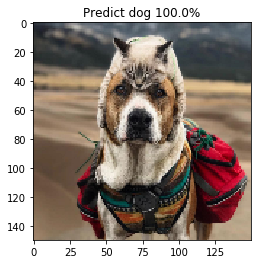

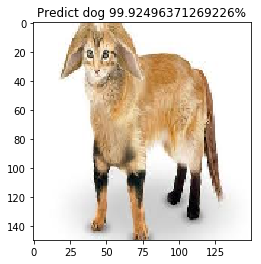

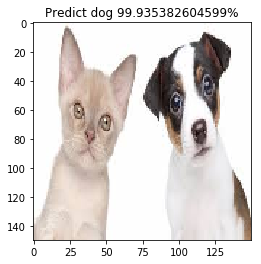

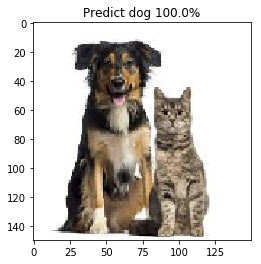

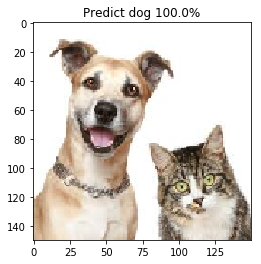

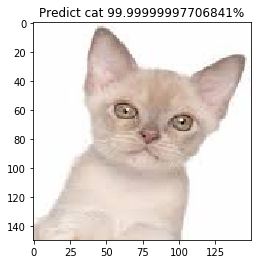

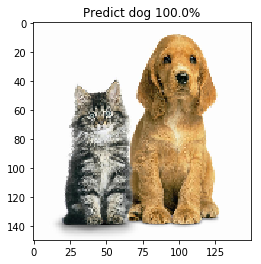

In [33]:
fnames = os.listdir(predict_data)
total_images = 0
num_true_preds = 0
for index in range(len(fnames)):
    fname = fnames[index]
    img_path = os.path.join(predict_data, fname)
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
   
    print("\nFile name: ", fname)
    
    # reshape image to (IMAGE_SIZE, IMAGE_SIZE, 3)
    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)
    x = x * 1. / 255;
    prob_pred = model.predict_proba(x)[0][0] * 100
    if(prob_pred < 50):
        prob_pred = 100 - prob_pred
    
    pred_class = model.predict_classes(x)[0][0]
    
    if pred_class == 0:
        pred_class = 'cat'
    else:
        pred_class = 'dog'
        
    if(fname.startswith('dog_')):
        true_class = 'dog'
    elif(fname.startswith('cat_')):
        true_class = 'cat'
    else:
        true_class = 'unknown'
    print("Probability predict is : ", prob_pred)
    print("Class predict is       : ", pred_class)
    print("True class is          : ", true_class)
    
    if(true_class == 'unknown'):
        plt.figure(index)
        plt.title("Predict {} {}%".format(pred_class, prob_pred))
        plt.imshow(img)
    
    if(true_class != 'unknown'):
        total_images += 1
    if(pred_class == true_class):
        num_true_preds += 1

print("\nNum images predict exactly is {}/{}".format(num_true_preds, total_images))